# Consigna: 
**Desarrollar un Árbol de Decisión de Clasificación con el dataset propuesto para el proyecto final del curso.** 


**1) Importamos librerías**

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import data
from sklearn import tree
from sklearn.metrics import confusion_matrix

**2) Leemos el dataframe:**\
**-El siguiente dataframe es el resultado de la primera entrega final del proyecto ya que contiene el EDA , Get Dummies, y los datos tratados.**

In [6]:
data_heart_final = pd.read_csv("data_heart_final.csv")
data_heart_final

,Unnamed: 0,edad,dolor_de_pecho,presion_en_reposo,colesterol_mg_dl,glucemia_en_ayunas,resultados_electrocardiograficos_en_reposo,frecuencia_cardiaca_maxima_alcanzada,depresion_st_ejercicio_segun_reposo,maxima_pendiente_st_ejercicio,vasos_principales_coloreados,talasemia,enfermo_cardiaco,sexo,angina_por_ejercicio
0,0,52,3,125,212,0,2,168,1.0,0,2,2,0,1,1
1,1,53,3,140,203,1,1,155,3.1,2,0,2,0,1,0
2,2,70,3,145,174,0,2,125,2.6,2,0,2,0,1,0
3,3,61,3,148,203,0,2,161,0.0,0,1,2,0,1,1
4,4,62,3,138,294,1,2,106,1.9,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1020,59,1,140,221,0,2,164,0.0,0,0,1,1,1,0
996,1021,60,3,125,258,0,1,141,2.8,1,1,2,0,1,0
997,1022,47,3,110,275,0,1,118,1.0,1,1,1,0,1,0
998,1023,50,3,110,254,0,1,159,0.0,0,0,1,1,0,1


**3) Separamos del dataframe las variables X e Y:**

In [7]:
X = data_heart_final.drop("enfermo_cardiaco", axis=1)
y = data_heart_final.enfermo_cardiaco

**4)Importamos la libreria para separar en train y test**


In [8]:
from sklearn.model_selection import train_test_split

**5) Me quedo con 30% del dataframe para test y 70% para train**


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

**6) Importamos de la libreria el modelo:**

In [10]:
from sklearn.tree import DecisionTreeClassifier

**7) Creamos el modelo arbol de decisión:**

In [11]:
arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42)

**8)Entrenamos el modelo**

In [12]:
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

**9) Predecimos en Train y Test:**


In [13]:
y_train_pred = arbol_de_decision.predict(X_train)


In [14]:
y_test_pred = arbol_de_decision.predict(X_test)

**10) Ahora ya podemos hacer el gráfico del arbol de decisión:**

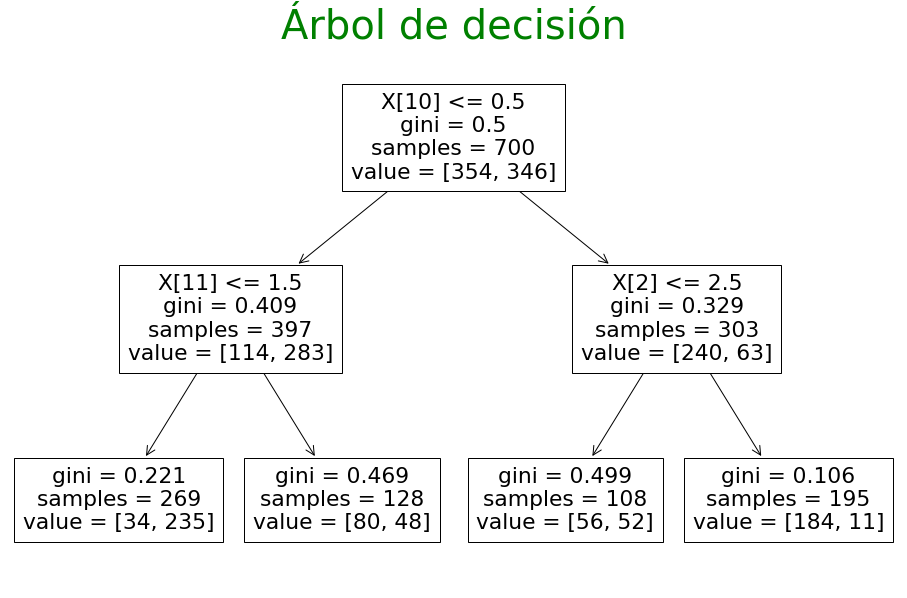

In [15]:
plt.figure(figsize=(16,10)) 
tree.plot_tree(arbol_de_decision.fit(X_train,y_train))
plt.title(label="Árbol de decisión",
           fontsize=40,
           color="green")
plt.show()

**11) A continuación, calculamos la métrica Accuracy:**\
**-Primero para el Train y luego para el Test:**

In [16]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'El % de aciertos sobre el set de entrenamiento: {round(train_accuracy,2)}%')
print(f'El % de aciertos sobre el set de evaluación:{round(test_accuracy,2)}%')

El % de aciertos sobre el set de entrenamiento: 0.79%
El % de aciertos sobre el set de evaluación:0.77%


**12) Ahora, visualizaremos el gráfico de Importancia de las variables en el modelo:**

C:\Users\doloc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


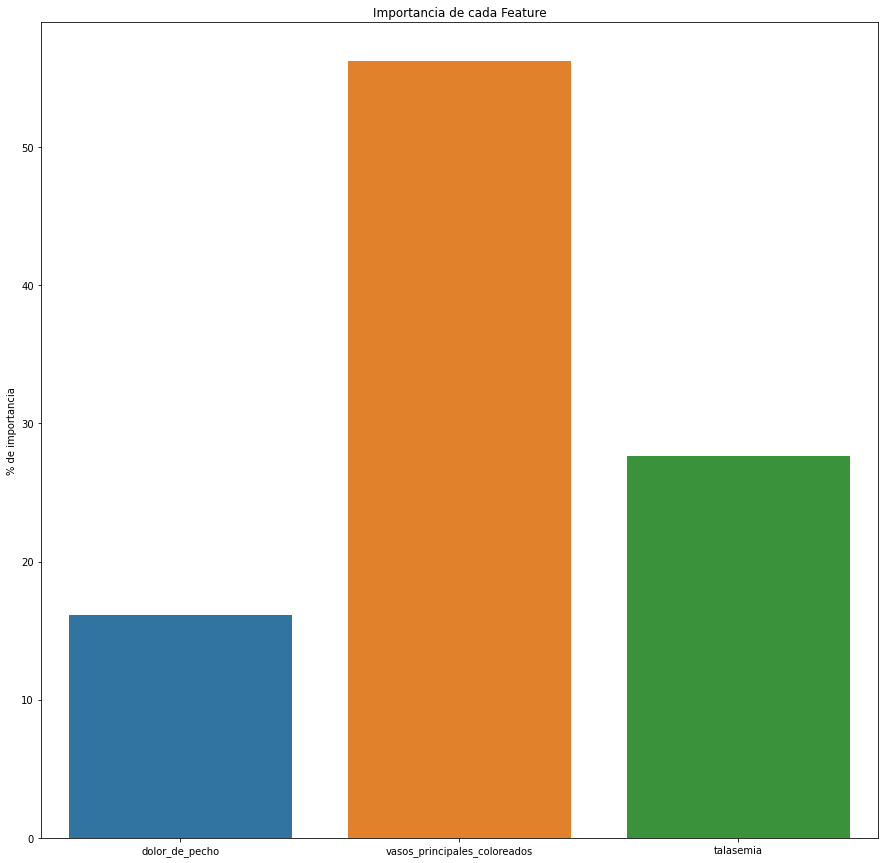

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def importances_clear(columnas,importances):
    col = list()
    imp = list()
    for indice in range(len(importances)):
        if importances[indice] != 0.0:
            col.append(columnas[indice])
            imp.append(importances[indice]*100)
    return col, imp
    
plt.figure(figsize=(15,15))
importances = arbol_de_decision.feature_importances_
columns = X.columns
col, imp = importances_clear(columns,importances)
sns.barplot(col,imp)
plt.title('Importancia de cada Feature')
plt.ylabel('% de importancia')
plt.show()

**13) Por último creamos la matriz de confusión y la visualizamos:**


In [18]:
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[122  16]
 [ 52 110]]
